5472 3648
points:  [[4060, 3364], [1716, 3364], [1904, 3044], [3816, 3044], [4084, 1596], [1696, 1596], [1892, 1600], [3832, 1600], [2872, 2400]]
cameraMatrix:  [[1.57406339e+03 0.00000000e+00 9.83431173e+02]
 [0.00000000e+00 1.21365111e+03 5.34504970e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


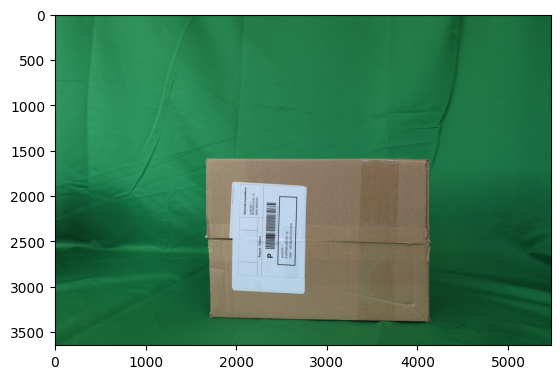

In [4]:
import cv2
from matplotlib import pyplot as plt
from handle_json import read_json 
import numpy as np


from src.lib.opts import opts
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell    

data = read_json()
data = data[0]
image = cv2.imread('data\\' + data['img_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
w, h = image.shape[1], image.shape[0]
print(w, h)
plt.imshow(image)

points = data['projection']
size = [30.5, 13, 23]

# mirror the y coordinates
for i in range(len(points)):
     points[i][1] = h - points[i][1]

print("points: ", points)



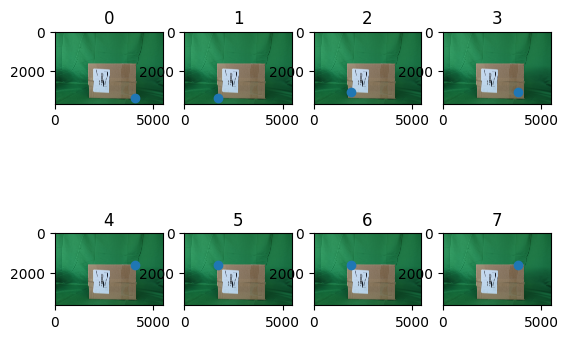

In [5]:
for i, p in enumerate(points[:8]):
     plt.subplot(2,4,i+1)
     plt.imshow(image)
     plt.scatter(p[0], p[1])
     plt.title(f"{i}")
plt.show() 

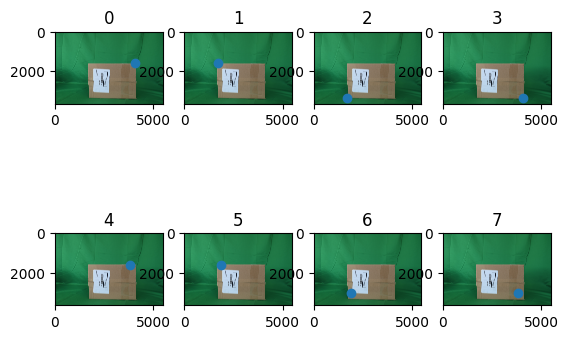

In [151]:
points = np.array([points[4], points[5], points[1], points[0], points[7], points[6], points[2], points[3]])   
for i, p in enumerate(points[:8]):
     plt.subplot(2,4,i+1)
     plt.imshow(image)
     plt.scatter(p[0], p[1])
     plt.title(f"{i}")
plt.show() 

Always starting from the bottom to the top (backside first)

In [152]:
# init
print(points)
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c = "cereal_box"
size = [30.5, 13, 23]
camera = np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)
meta = {"width": w,"height": h, "camera_matrix":camera }
bbox = {'kps': points, "obj_scale": size}

[[4084 1596]
 [1696 1596]
 [1716 3364]
 [4060 3364]
 [3832 1600]
 [1892 1600]
 [1904 3044]
 [3816 3044]]


In [156]:
projected_points, point_3d_cam, scale, points_ori, bbox = pnp_shell(opt, meta, bbox, points[:4], size, OPENCV_RETURN=False)
print(bbox['projected_cuboid'])

TypeError: cannot unpack non-iterable NoneType object

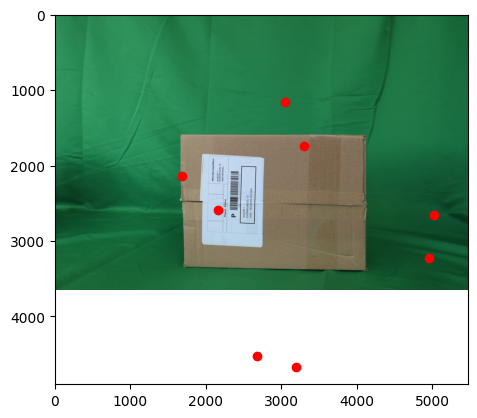

In [155]:
plt.imshow(image)
for p in bbox["projected_cuboid"]:
    plt.plot(p[0], p[1], "ro")
plt.show()